In [24]:
import math, os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



from IPython.display import set_matplotlib_formats


In [25]:

set_matplotlib_formats('retina')

plt.ioff()

In [26]:
df = pd.read_csv('/Users/mahaksharma/Downloads/globalterrorismdb_0617dist.csv', encoding='latin1')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
df_nepal = df[df['country_txt'] == 'Nepal']
df_nepal[['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'provstate', 'latitude',  'longitude', 'gname', 'nkill']].head()

,eventid,iyear,imonth,iday,country_txt,provstate,latitude,longitude,gname,nkill
25420,198506200009,1985,6,20,Nepal,Central,27.718332,85.325337,United Liberation Torchbearers Forces,4.0
25421,198506200010,1985,6,20,Nepal,Central,27.718332,85.325337,United Liberation Torchbearers Forces,2.0
25422,198506200011,1985,6,20,Nepal,Central,27.718332,85.325337,United Liberation Torchbearers Forces,0.0
25423,198506200012,1985,6,20,Nepal,Central,27.718332,85.325337,United Liberation Torchbearers Forces,0.0
25424,198506200013,1985,6,20,Nepal,Central,27.718332,85.325337,United Liberation Torchbearers Forces,0.0


In [28]:
df_nepal.shape

(967, 135)

In [29]:
df_nepal['gname'] = df_nepal['gname'].replace('Communist Party of Nepal- Maoist (CPN-M)', 'Maoists')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


plotting the events location in the actual map of Nepal


In [30]:
# list of associated groups in Nepal

terror_groups = df_nepal['gname'].unique().tolist()
terror_groups[:10]

['United Liberation Torchbearers Forces',
 'Unknown',
 'All Nepal Free Nationalist Students Union',
 'Anti-Monarchists',
 'Left-Wing Terrorists',
 "United People's Front",
 'Political Group',
 'Rival Party Members',
 "National People's Movement Coordination Committee",
 'Maoists']

In [31]:
my_dict = dict(df_nepal['gname'].value_counts())
group_events_df = pd.DataFrame(columns=['group_name', 'total_events'])

In [32]:
total_others_events = 0
for i, group in enumerate(terror_groups):
    total_events = my_dict[group]
    if total_events > 9:
        group_events_df.loc[i] = [group, total_events]
    else:
        total_others_events += total_events

group_events_df.loc[i+1] = ['OTHERS', total_others_events]

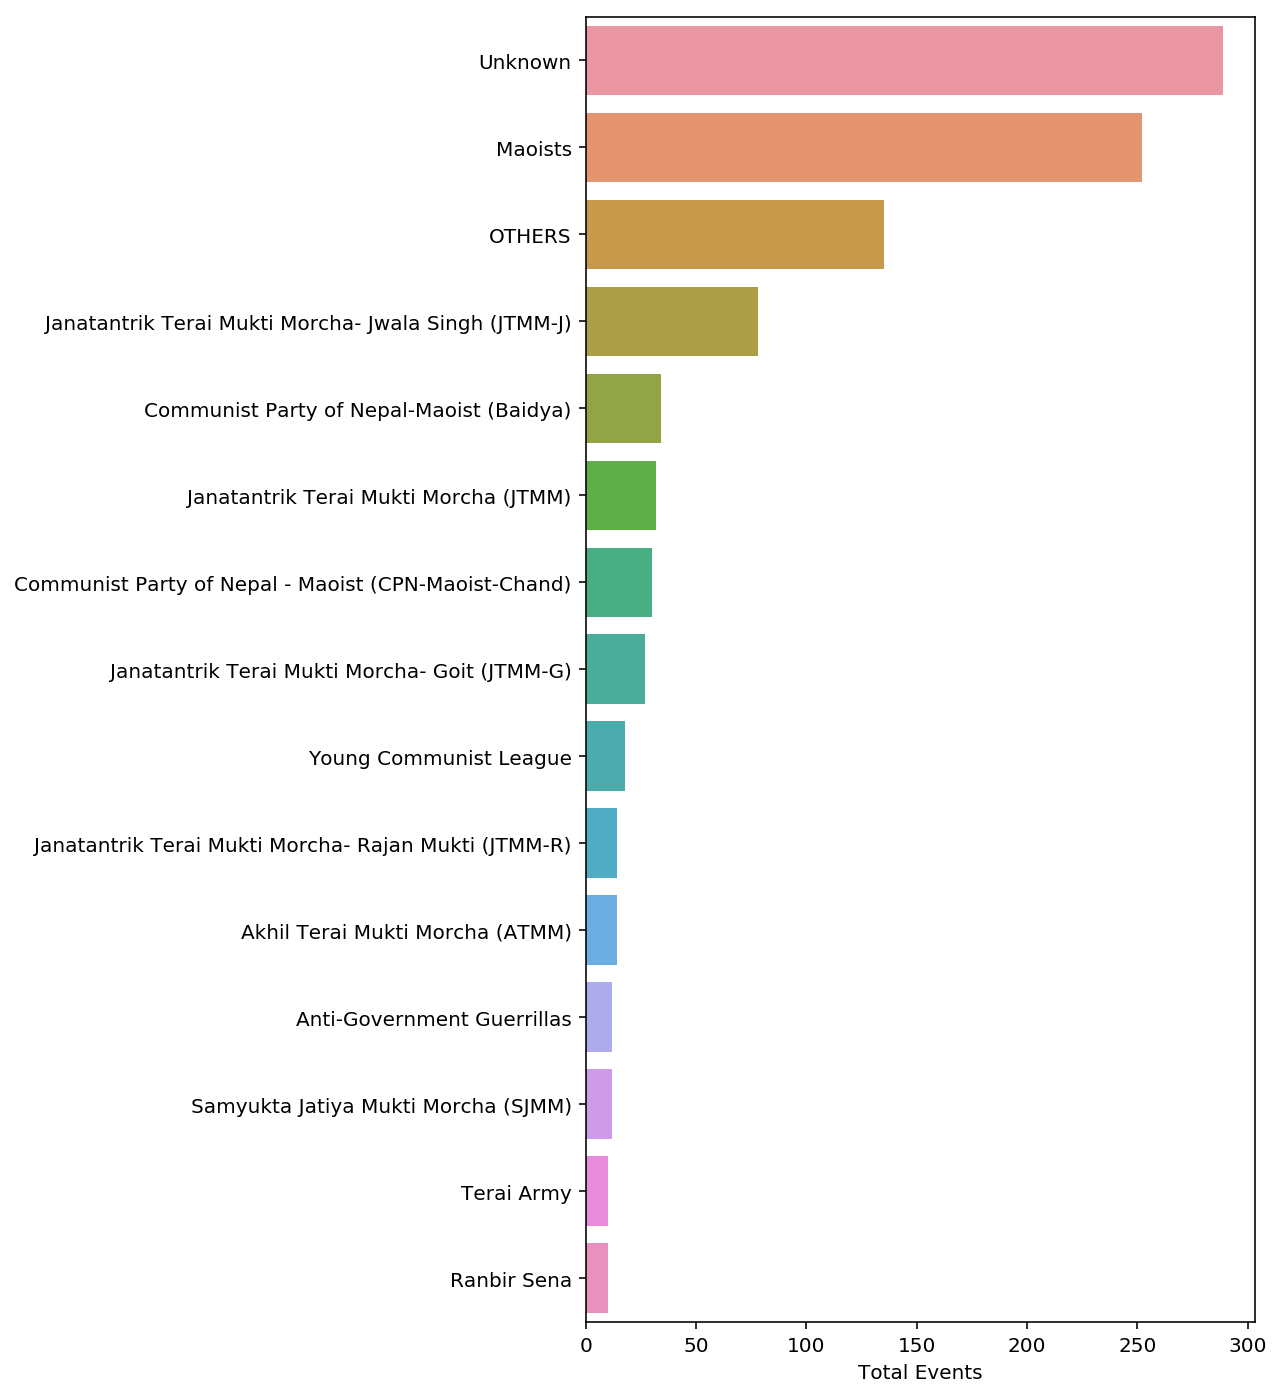

In [33]:
fig, ax = plt.subplots(figsize=(6, 12))
sns.barplot(x='total_events', y = 'group_name', data = group_events_df.sort_values('total_events', ascending=False))
ax.set(xlabel="Total Events", ylabel="")
plt.show()

In [34]:
def num_killed_group(df = df_nepal):     # number of people killed by each group
    
    nkill_group_dict, nkillter_group_dict = dict(), dict()
    for group in terror_groups:
        nkill_group, nkillter_group = 0, 0
        for i in range(df.shape[0]):
            if df['gname'].tolist()[i] == group:
                if pd.isnull(df['nkill'].tolist()[i]): continue
                else: nkill_group += df['nkill'].tolist()[i]

            if df_nepal['gname'].tolist()[i] == group:
                if pd.isnull(df['nkillter'].tolist()[i]): continue
                else: nkillter_group += df['nkillter'].tolist()[i]

        nkill_group_dict[group] = nkill_group
        nkillter_group_dict[group] = nkillter_group
        
    return nkill_group_dict, nkillter_group_dict

In [35]:
nkill_group_dict, nkillter_group_dict = num_killed_group(df_nepal)



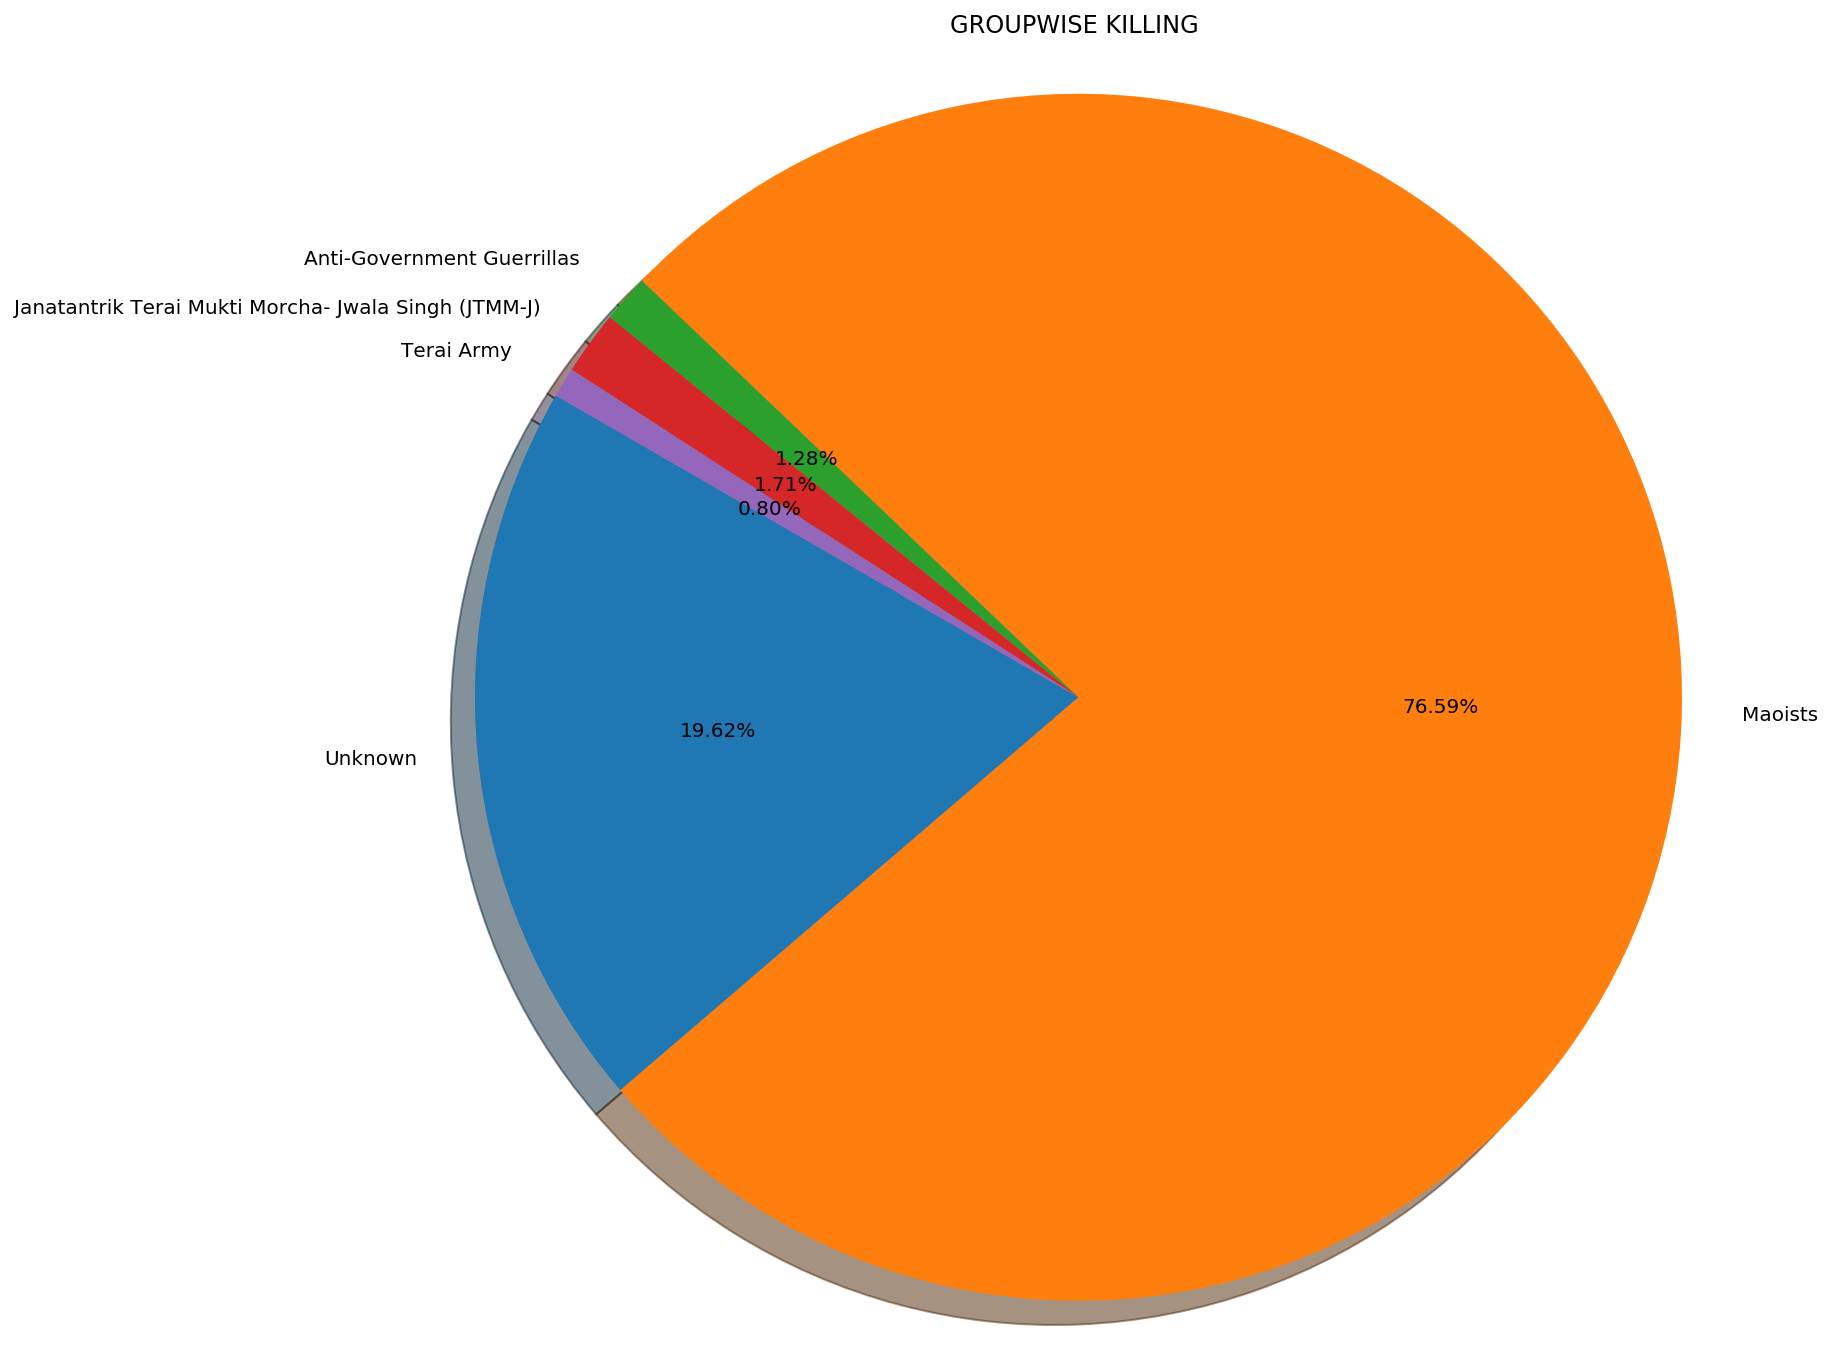

In [36]:
n_killed, groups = [], []
for group in list(nkill_group_dict.keys()):
    nkilled = nkill_group_dict[group]
    if nkilled < 15: continue
    n_killed.append(nkilled)
    groups.append(group)
    
plt.figure(figsize=(12,12))
plt.pie(n_killed, labels=groups, autopct='%1.2f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('GROUPWISE KILLING')
plt.show()

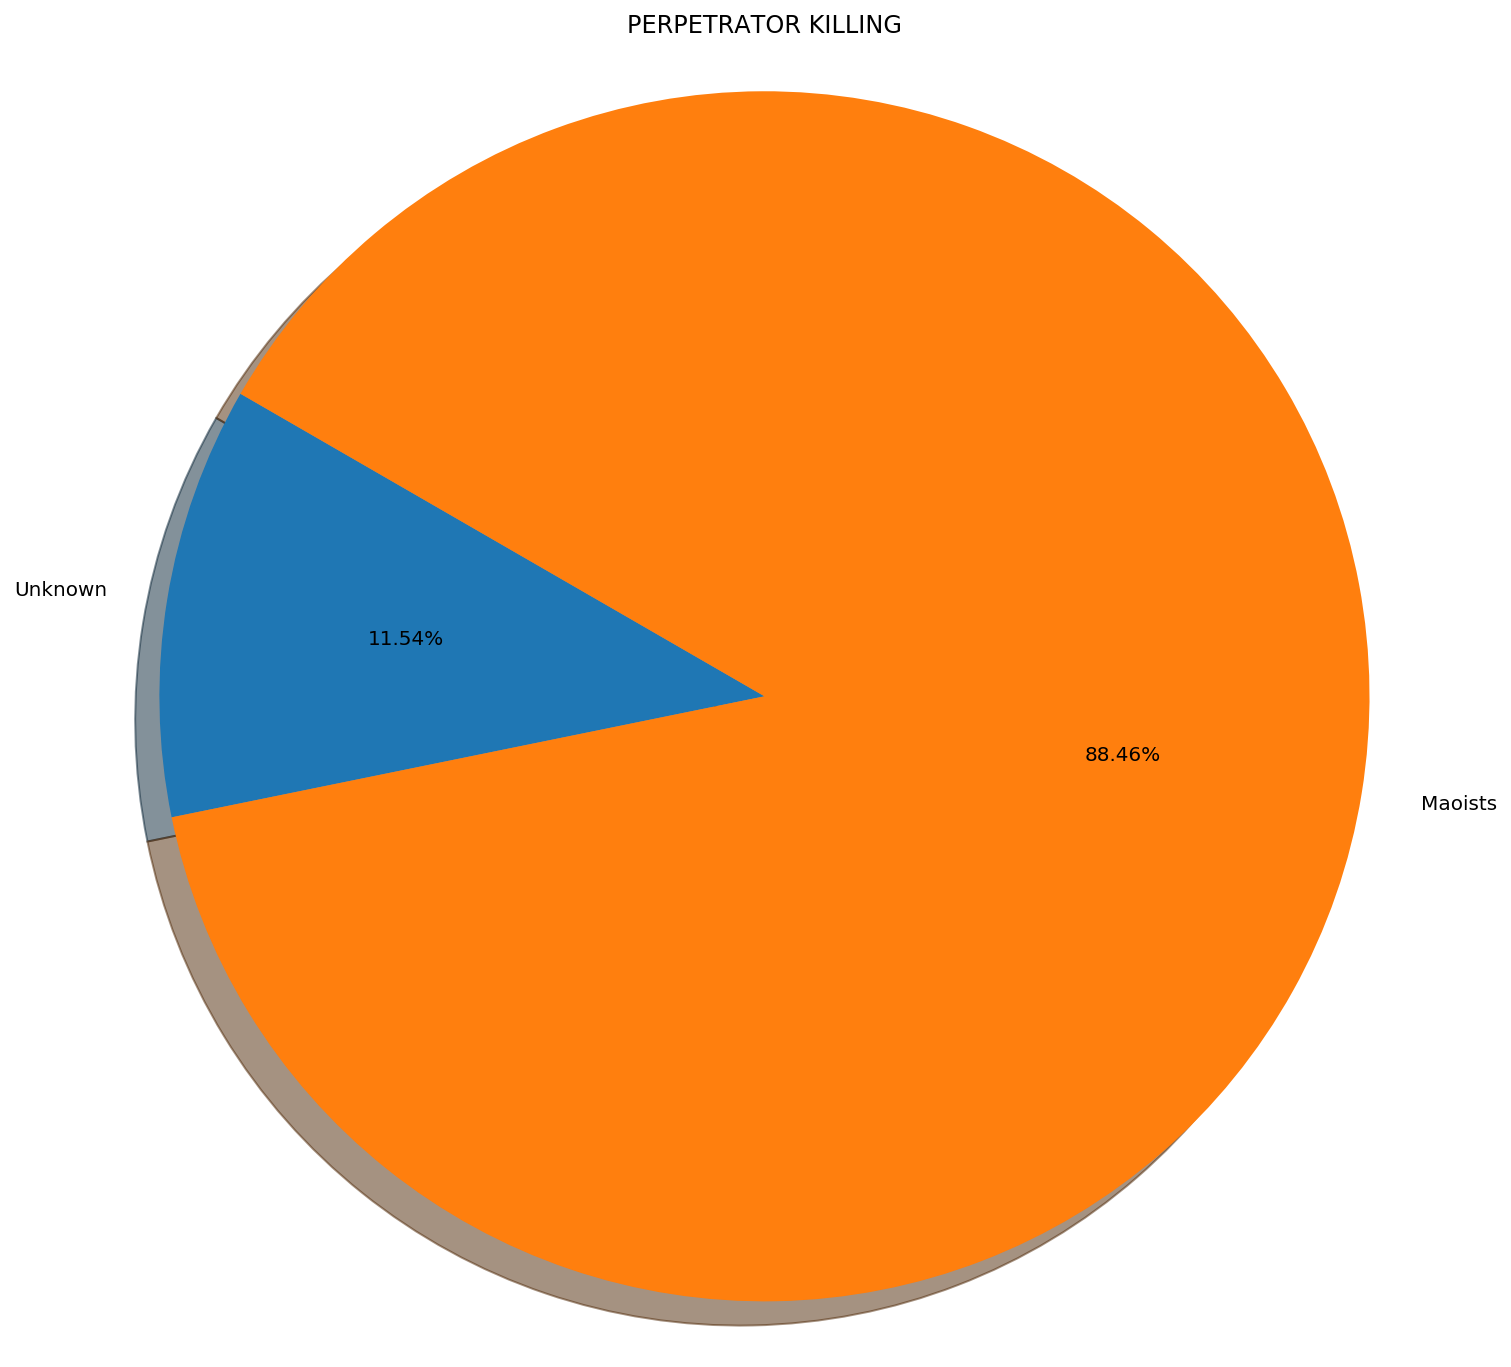

In [37]:
nter_killed, groups = [], []
for group in list(nkillter_group_dict.keys()):
    nkilled = nkillter_group_dict[group]
    if nkilled < 15: continue
    nter_killed.append(nkilled)
    groups.append(group)
    
plt.figure(figsize=(12,12))
plt.pie(nter_killed, labels=groups, autopct='%1.2f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('PERPETRATOR KILLING')
plt.show()

In [38]:
tmp_df = pd.DataFrame(columns = ['group', 'nkill', 'nkillter'])


tmp_df['group'] = nkill_group_dict.keys()

# adding nkill column
tmp_df['nkill'] = nkill_group_dict.values()

# adding nkillter columns
tmp_df['nkillter'] = nkillter_group_dict.values()

In [39]:
def group_name_rearrange():
    new_groups = []
    for group in tmp_df['group'].tolist():
        words = group.split()
        new_name = ''
        for i in range(len(words)):
            new_name += words[i] + ' '
            if i != 0 and i % 2 == 0: new_name += '\n'
        new_groups.append(new_name)
    return new_groups


In [42]:
new_groups = group_name_rearrange()
tmp_df['group'] = new_groups

# sorting the data and taking only few to get clear graph
tmp_df = tmp_df.sort_values(['nkill', 'nkillter'], ascending=[False, False])[:7]


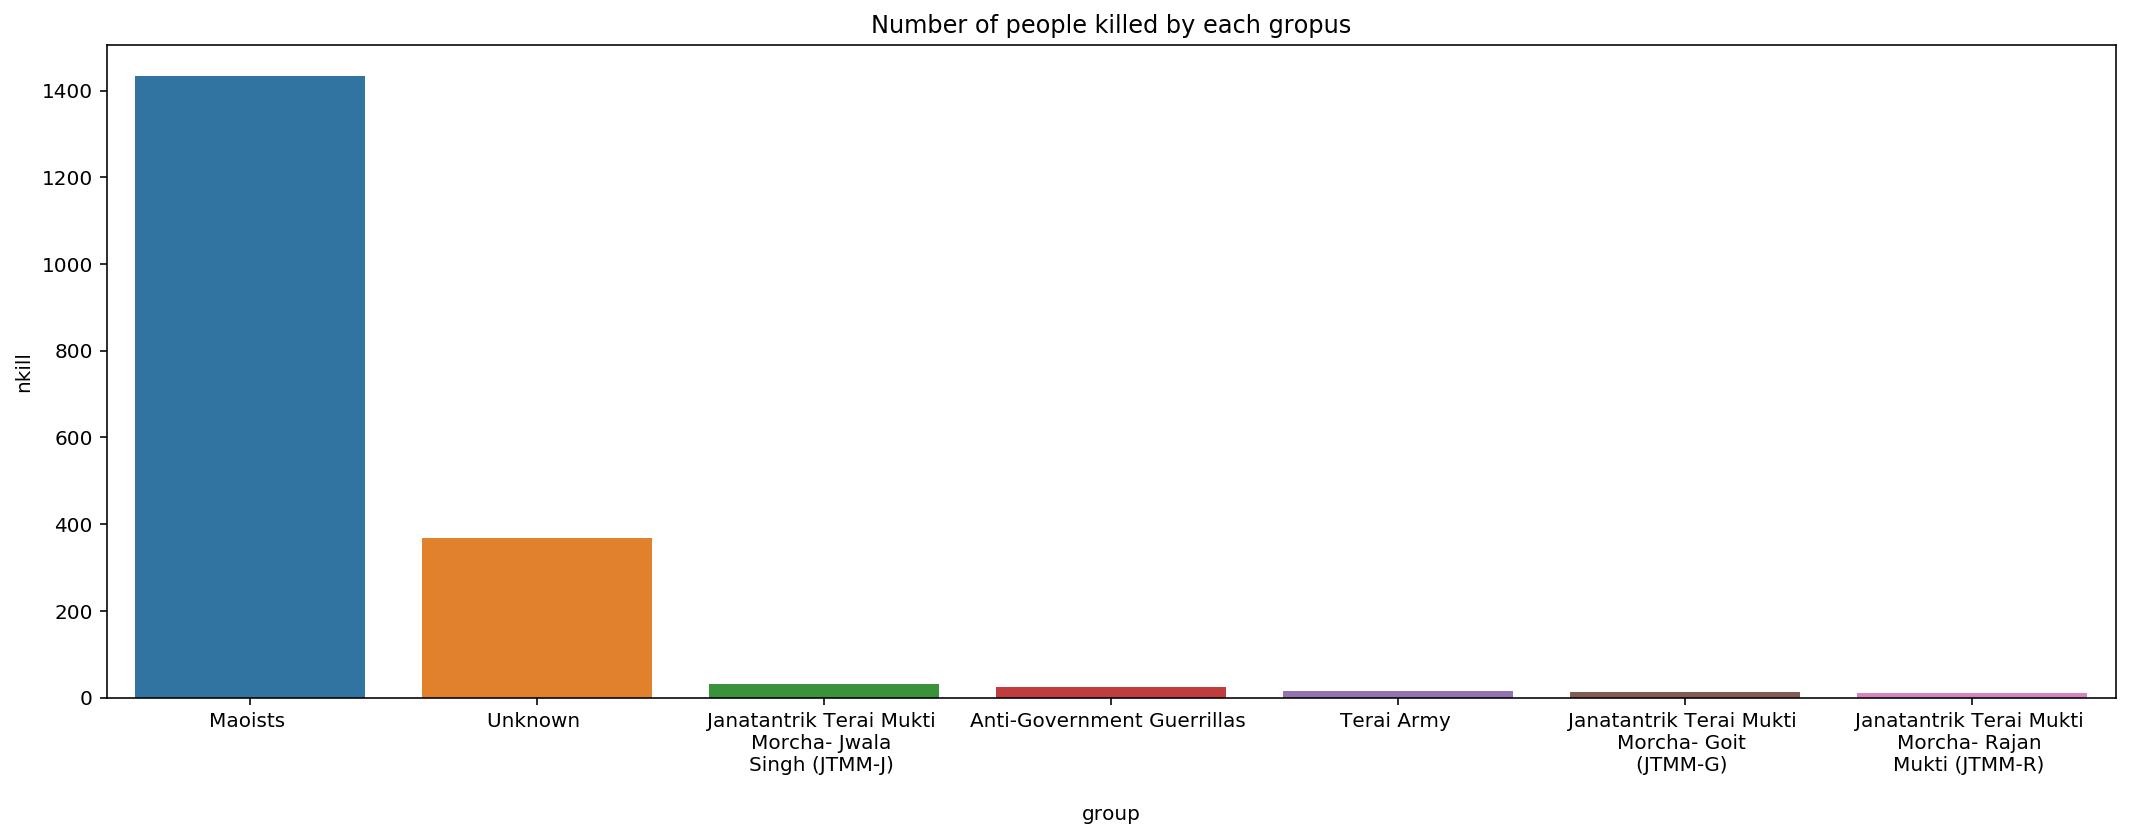

In [43]:
plt.figure(figsize=(18,6))
sns.barplot(x='group', y='nkill', data=tmp_df)
plt.title('Number of people killed by each gropus')
plt.show()

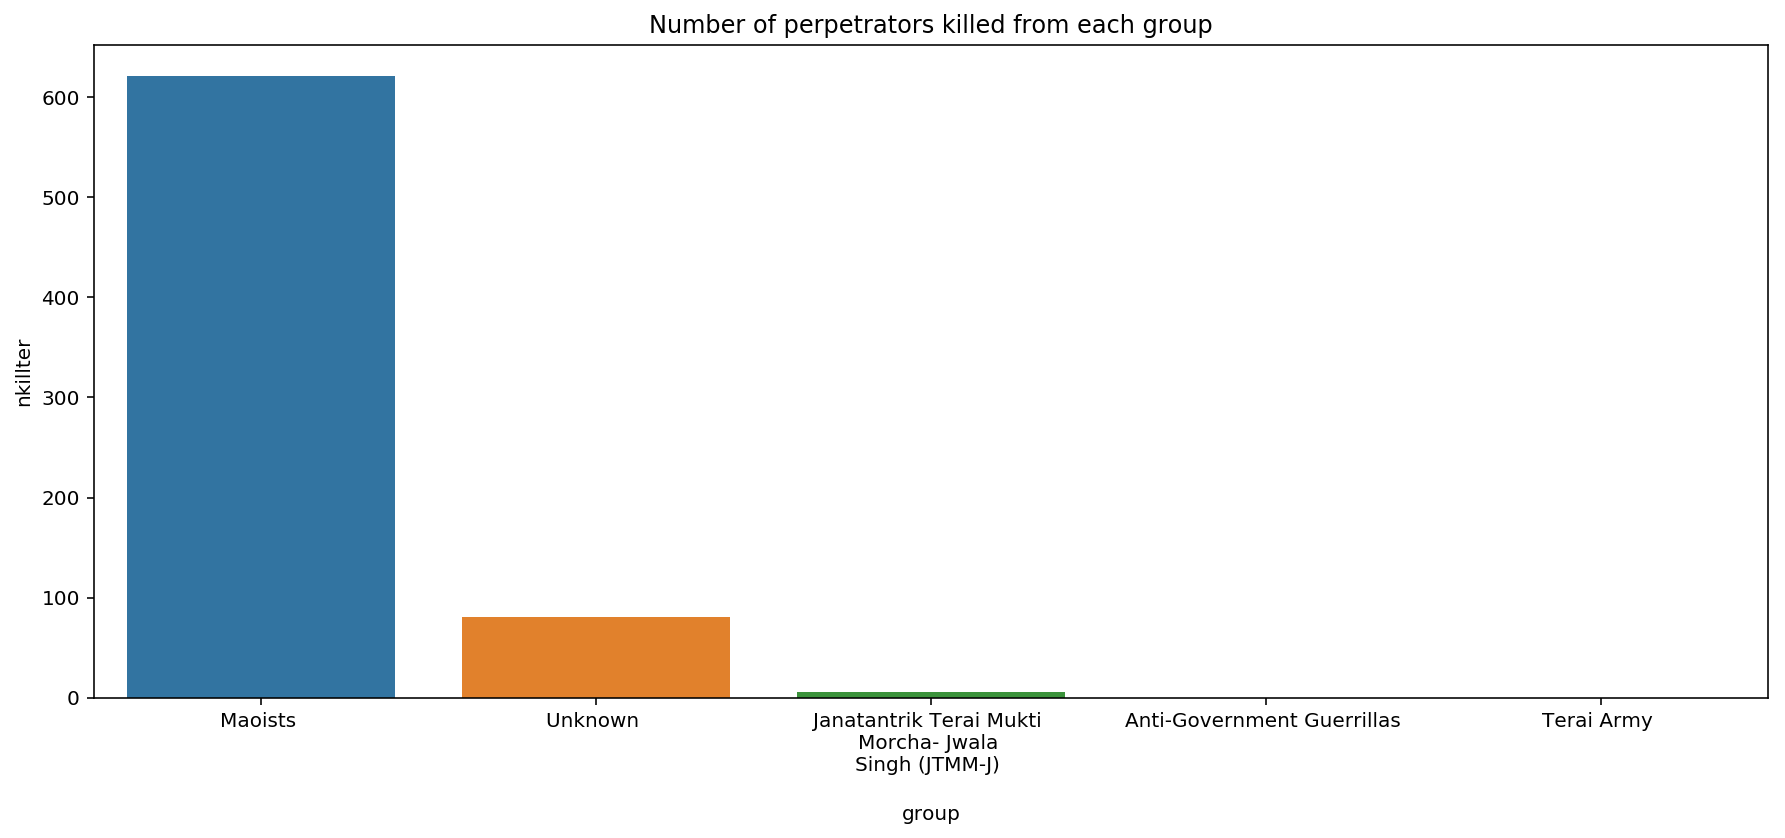

In [44]:
plt.figure(figsize=(15,6))
sns.barplot(x='group', y='nkillter', data=tmp_df[:5])
plt.title('Number of perpetrators killed from each group')
plt.show()

In [45]:
df_nepal[['gname', 'attacktype1_txt', 'weaptype1_txt', 'nkill']].head()

,gname,attacktype1_txt,weaptype1_txt,nkill
25420,United Liberation Torchbearers Forces,Bombing/Explosion,Explosives/Bombs/Dynamite,4.0
25421,United Liberation Torchbearers Forces,Bombing/Explosion,Explosives/Bombs/Dynamite,2.0
25422,United Liberation Torchbearers Forces,Bombing/Explosion,Explosives/Bombs/Dynamite,0.0
25423,United Liberation Torchbearers Forces,Bombing/Explosion,Explosives/Bombs/Dynamite,0.0
25424,United Liberation Torchbearers Forces,Bombing/Explosion,Explosives/Bombs/Dynamite,0.0


In [46]:
tmp=(pd.get_dummies(df_nepal[['gname', 'attacktype1_txt', 'nkill']].sort_values('nkill', ascending=False)).corr()[1:])
tmp = tmp[tmp.columns[56:]]
tmp.head()

,gname_Sudurpaschim Janata Dal,gname_Swatantra Nepal Dal,gname_Terai Army,gname_Terai Cobra,gname_Terai Communist Party,gname_Terai Janatantrik Madhes Party,gname_Terai Madheshi Mukti Morcha (TMMM),gname_Terai Rastriya Mukti Sena (TRMS),gname_Tharuhat Joint Struggle Committee (TJSC),gname_Unified Communist Party of Nepal (Maoist),...,gname_Young Communist League,attacktype1_txt_Armed Assault,attacktype1_txt_Assassination,attacktype1_txt_Bombing/Explosion,attacktype1_txt_Facility/Infrastructure Attack,attacktype1_txt_Hijacking,attacktype1_txt_Hostage Taking (Barricade Incident),attacktype1_txt_Hostage Taking (Kidnapping),attacktype1_txt_Unarmed Assault,attacktype1_txt_Unknown
gname_Akhil Terai Mukti Morcha (ATMM),-0.003900,-0.003900,-0.012390,-0.005518,-0.005518,-0.003900,-0.003900,-0.003900,-0.005518,-0.003900,...,-0.016692,0.050256,-0.026463,0.039805,-0.044309,-0.003900,-0.005518,-0.042075,-0.011070,-0.026463
gname_All Nepal Free Nationalist Students Union,-0.001035,-0.001035,-0.003289,-0.001465,-0.001465,-0.001035,-0.001035,-0.001035,-0.001465,-0.001035,...,-0.004431,-0.015754,-0.007025,-0.030838,-0.011762,-0.001035,-0.001465,-0.011169,0.352270,-0.007025
gname_All Nepal National Free Student Union-Revolutionary,-0.002074,-0.002074,-0.006588,-0.002934,-0.002934,-0.002074,-0.002074,-0.002074,-0.002934,-0.002074,...,-0.008876,-0.031557,-0.014072,-0.029519,0.126331,-0.002074,-0.002934,-0.022373,-0.005886,-0.014072
gname_Anti-Government Guerrillas,-0.003607,-0.003607,-0.011459,-0.005103,-0.005103,-0.003607,-0.003607,-0.003607,-0.005103,-0.003607,...,-0.015438,0.016070,-0.024475,-0.013942,-0.012012,-0.003607,-0.005103,0.051542,-0.010238,-0.024475
gname_Anti-Government extremists,-0.001035,-0.001035,-0.003289,-0.001465,-0.001465,-0.001035,-0.001035,-0.001035,-0.001465,-0.001035,...,-0.004431,-0.015754,-0.007025,0.033569,-0.011762,-0.001035,-0.001465,-0.011169,-0.002939,-0.007025


In [ ]:
plt.figure(figsize=(8,15))
ax = sns.heatmap(tmp, cmap='plasma', vmin=-0.1, vmax=1, annot=True)
plt.show()
